In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import math
import matplotlib
from matplotlib.colors import LogNorm, Normalize
from matplotlib import ticker
import matplotlib.transforms as transforms
import os


plt.rcParams['text.usetex'] = False

# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
#%matplotlib widget

sns.set_theme(style="whitegrid", context="talk", palette=sns.color_palette("colorblind"))
display(sns.__version__)

'0.13.0'

# Precomputation

## Monolith with filtering of dominated decisions

/var/folders/g5/1rtzvly507l2d11zpyxg27vm0000gn/T/ipykernel_77382/2167193062.py:9: FutureWarning: The provided callable <function median at 0x10cae70d0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_precomp_pivot = df_precomp.query("`num_d` > 2 and `num_c` > 2").pivot_table(index="num_c", columns="num_d", values="duration_min", aggfunc=np.median)


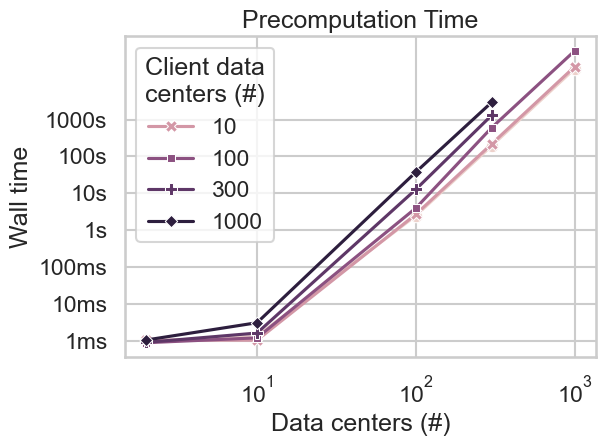

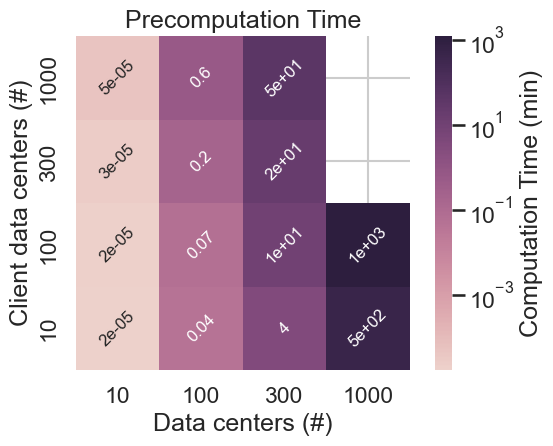

In [3]:
df_precomp = pd.read_csv("results/precomputation/precomputation.csv", skipinitialspace=True)

df_precomp = df_precomp[df_precomp["implementation"] == 'Monolith']
df_precomp["duration_ms"] = df_precomp["duration_s"] * 1000
df_precomp["duration_min"] = df_precomp["duration_s"] / 60
df_precomp_data_centers = df_precomp #[df_precomp["num_c"] == 300]
df_precomp_client_data_centers = df_precomp[df_precomp["num_d"] == 300]
# Pivot for heatmap, by num_d, num_c for "duration_s"
df_precomp_pivot = df_precomp.query("`num_d` > 2 and `num_c` > 2").pivot_table(index="num_c", columns="num_d", values="duration_min", aggfunc=np.median)
df_precomp_pivot.sort_index(inplace=True, ascending=False)

fig, ax1 = plt.subplots()

# Plot time of oracle
plot_args = dict(
    dashes=False,
    markers=True,
    hue="num_c",
    style="num_c",
    y="duration_ms",
    legend="full"
)
sns.lineplot(data=df_precomp_data_centers, x="num_d", ax=ax1, **plot_args, hue_norm=LogNorm())

ax1.set_yscale("log")
ax1.set_xscale("log")

ax1.set_yticks([10**0, 10**1, 10**2, 10**3])

yticks=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
yticklabels=['100us', '1ms', '10ms', '100ms', '1s', '10s', '100s', '1000s']
ax1.set(yticks=yticks[1:], yticklabels=yticklabels[1:])

ax1.set_ylabel("Wall time")
ax1.set_xlabel("Data centers (#)")
ax1.set_title("Precomputation Time")

# Set legend title
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[1:], labels=labels[1:], title="Client data\ncenters (#)")
fig.tight_layout()
fig.savefig("./figures/precomputation_linegraph.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(as_cmap=True)
g3 = sns.heatmap(df_precomp_pivot, ax=ax, square=True, cmap=cmap, annot=True, norm=LogNorm(), cbar_kws={"label": "Computation Time (min)"}, annot_kws={'rotation': 45, "fontsize": 12}, fmt=".1g", cbar=True, robust=True)
g3.set_ylabel(None)

g3.set_title("Precomputation Time")
g3.set_xlabel("Data centers (#)")
g3.set_ylabel("Client data centers (#)")

fig.tight_layout()
fig.savefig("./figures/precomputation_heatmap.pdf", bbox_inches="tight")

## Monolith enumerating only

/var/folders/g5/1rtzvly507l2d11zpyxg27vm0000gn/T/ipykernel_77382/743098486.py:9: FutureWarning: The provided callable <function median at 0x10cae70d0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_precomp_pivot = df_precomp.query("`num_d` > 2 and `num_c` > 2").pivot_table(index="num_c", columns="num_d", values="duration_s", aggfunc=np.median)


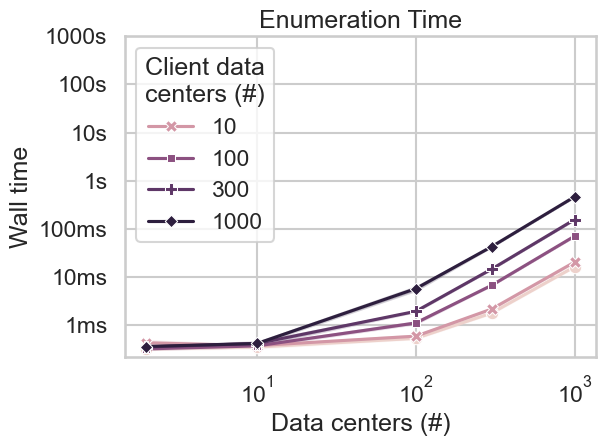

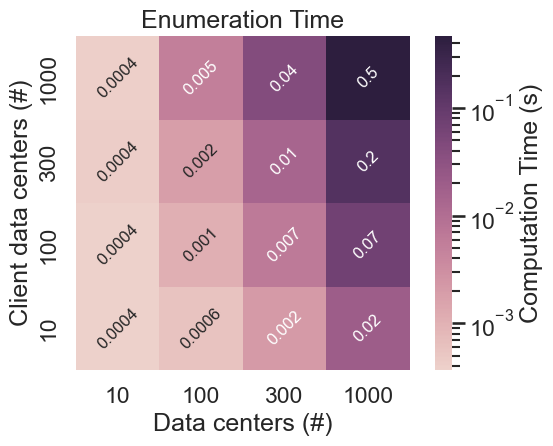

In [4]:
df_precomp = pd.read_csv("results/precomputation/precomputation.csv", skipinitialspace=True)

df_precomp = df_precomp[df_precomp["implementation"] == 'Monolith - Enumeration only']
df_precomp["duration_ms"] = df_precomp["duration_s"] * 1000
df_precomp["duration_min"] = df_precomp["duration_s"] / 60
df_precomp_data_centers = df_precomp #[df_precomp["num_c"] == 300]
df_precomp_client_data_centers = df_precomp[df_precomp["num_d"] == 300]
# Pivot for heatmap, by num_d, num_c for "duration_s"
df_precomp_pivot = df_precomp.query("`num_d` > 2 and `num_c` > 2").pivot_table(index="num_c", columns="num_d", values="duration_s", aggfunc=np.median)
df_precomp_pivot.sort_index(inplace=True, ascending=False)

fig, ax1 = plt.subplots()

# Plot time of oracle
plot_args = dict(
    dashes=False,
    markers=True,
    hue="num_c",
    style="num_c",
    y="duration_ms",
    legend="full"
)
sns.lineplot(data=df_precomp_data_centers, x="num_d", ax=ax1, **plot_args, hue_norm=LogNorm())

ax1.set_yscale("log")
ax1.set_xscale("log")

ax1.set_yticks([10**0, 10**1, 10**2, 10**3])

yticks=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
yticklabels=['100us', '1ms', '10ms', '100ms', '1s', '10s', '100s', '1000s']
ax1.set(yticks=yticks[1:], yticklabels=yticklabels[1:])

ax1.set_ylabel("Wall time")
ax1.set_xlabel("Data centers (#)")
ax1.set_title("Enumeration Time")

# Set legend title
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[1:], labels=labels[1:], title="Client data\ncenters (#)")
fig.tight_layout()
fig.savefig("./figures/precomputation_enumeration_linegraph.pdf", bbox_inches="tight")

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(as_cmap=True)
g3 = sns.heatmap(df_precomp_pivot, ax=ax, square=True, cmap=cmap, annot=True, norm=LogNorm(), cbar_kws={"label": "Computation Time (s)"}, annot_kws={'rotation': 45, "fontsize": 12}, fmt=".1g", cbar=True, robust=True)
g3.set_ylabel(None)

g3.set_title("Enumeration Time")
g3.set_xlabel("Data centers (#)")
g3.set_ylabel("Client data centers (#)")

fig.tight_layout()
fig.savefig("./figures/precomputation_enumeration_heatmap.pdf", bbox_inches="tight")

# Use case 1: Minimization

/tmp/ipykernel_111773/623203294.py:75: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


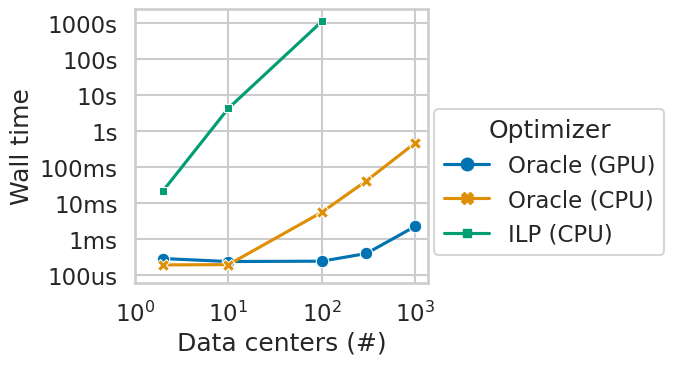

In [19]:
df1 = pd.read_csv("results/use_case_minimization/data_center_scaling_oracle.csv")
df1["Approach"] = "Oracle"
df_tmp = pd.read_csv("results/use_case_minimization/data_center_scaling_ilp.csv")
df_tmp["Approach"] = "ILP"
df_tmp["device"] = "cpu"
df1 = pd.concat([df1, df_tmp])
df1["device"].replace({"cpu": "CPU", "cuda": "GPU"}, inplace=True)
df1["Approach + Device"] = df1["Approach"] + " (" + df1["device"] + ")"

df1_param = pd.read_csv("results/use_case_minimization/client_data_center_scaling_oracle.csv")
df1_param["Approach"] = "Oracle"
# Check if file exists
import os
if os.path.isfile("results/use_case_minimization/client_data_center_scaling_ilp.csv"):
    df_tmp = pd.read_csv("results/use_case_minimization/client_data_center_scaling_ilp.csv")
    df_tmp["Approach"] = "ILP"
    df_tmp["device"] = "cpu"
    df1_param = pd.concat([df1_param, df_tmp])
df1_param["device"].replace({"cpu": "CPU", "cuda": "GPU"}, inplace=True)
df1_param["Approach + Device"] = df1_param["Approach"] + " (" + df1_param["device"] + ")"

df1["time_per_simulation_ms"] = df1["time_per_simulation"] * 1000
df1_param["time_per_simulation_ms"] = df1_param["time_per_simulation"] * 1000
#display(df1)

# Make two subplots that are double the width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# Plot time of oracle
palette = sns.color_palette("colorblind")
sns.lineplot(data=df1, x="num_data_centers", y="time_per_simulation_ms", ax=ax1, dashes=False, markers=True, style="Approach + Device", hue="Approach + Device", errorbar=None)

sns.lineplot(data=df1_param, x="num_client_data_centers", y="time_per_simulation_ms", ax=ax2, dashes=False, markers=True, style="Approach + Device", hue="Approach + Device", errorbar=None)

# Plot time of ILP as vertical line
#ax1.axhline(y=ilp_time, color="r", linestyle="--", linewidth=1)
# Label ILP line
#ax1.text(0.5, 0.9, "ILP", transform=ax1.transAxes, color="r", fontsize=15, ha="center", va="center", weight="bold")

# Make both axes logarithmic
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2.set_xscale("log")
ax2.set_yticks([10**0, 10**1, 10**2, 10**3])

yticks=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
yticklabels=['100us', '1ms', '10ms', '100ms', '1s', '10s', '100s', '1000s']
xticks=[1, 10, 100, 1000]
ax1.set(yticks=yticks, yticklabels=yticklabels, xticks=xticks)

ax1.set_ylabel("Wall time")
ax1.set_xlabel("Data centers (#)")
ax1.set_title("(a) Scaling in decisions")

ax2.set_xlabel("Client data centers (#)")
ax2.set_title("(b) Scaling in dimensions")

# Remove title from legend
handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles=handles, labels=labels, title=None)
ax1.legend().remove()

fig.tight_layout()
fig.savefig("./figures/scaling.pdf", bbox_inches="tight")

# Drop ax2 from the the figure for the headline figure
handles, labels = ax2.get_legend_handles_labels()
ax1.set_title(None)
# Place legend left outside the figure
fig.legend(handles=handles, labels=labels, title="Optimizer", loc="center left", bbox_to_anchor=(0.55, 0.5))
#ax1.legend(handles=handles, labels=labels, title=None)

fig.delaxes(ax2)
fig.tight_layout()
fig.savefig("./figures/headline_scaling.pdf", bbox_inches="tight")

# Use case 2: Scenario Simulation

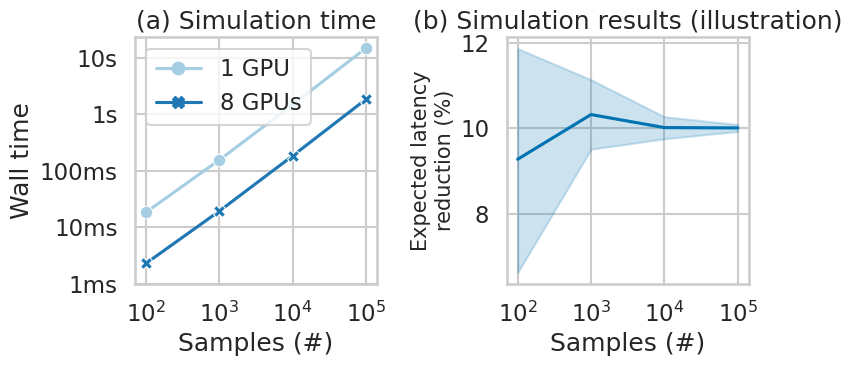

In [20]:
df2 = pd.read_csv("results/use_case_simulation/simulation.csv", comment="#")
df2["Approach"] = "Oracle (1 GPU)"
df2["device"] = "1 GPU"

# Simulate 8 GPUs by dividing time by 8
df_tmp = df2.copy()
df_tmp["device"] = "8 GPUs"
df_tmp["Approach"] = "Oracle (8 GPUs)"
df_tmp["elapsed_time"] /= 8

df2 = pd.concat([df2, df_tmp])

df2["elapsed_time_min"] = df2["elapsed_time"] / 60
df2["elapsed_time_ms"] = df2["elapsed_time"] * 1000
df2["time_per_simulation_ms"] = df2["time_per_simulation"] * 1000

# Make two subplots that are double the width
#fig, ax1 = plt.subplots(1,1)
# Make two subplots that are double the width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=False)

# Plot time of oracle
palette = sns.color_palette("Paired", n_colors=2)
sns.lineplot(data=df2, x="batch_size", y="elapsed_time_ms", ax=ax1, markers=True, dashes=False, style="device", hue="device", palette=palette)

# Make both axes logarithmic
ax1.set_xscale("log")
ax1.set_yscale("log")

yticks=[0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
yticklabels=['100us', '1ms', '10ms', '100ms', '1s', '10s', '100s', '1000s']
ax1.set(yticks=yticks[1:-2], yticklabels=yticklabels[1:-2])

ax1.set_ylabel("Wall time")
#ax1.set_ylabel("Total Optimization time")
ax1.set_xlabel("Samples (#)")
ax1.set_title("(a) Simulation time")

# Remove title from legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, title=None)

# Illustrate simulation results

# Sample sizes
sample_sizes = list(df2["batch_size"].unique())

dfs = []
for sample_size in sample_sizes: #[sample_sizes[0], sample_sizes[-1]]:
    # Use same seed as in simulation
    np.random.seed(42)
    # Draw samples from normal distribution
    samples = np.random.normal(loc=-5, scale=15, size=sample_size)
    samples2 = np.random.normal(loc=25, scale=5, size=sample_size)
    samples = np.concatenate((samples, samples2))
    # Create dataframe for each sample and a column for the sample size
    dfs.append(pd.DataFrame(samples, columns=["samples"]))
    dfs[-1]["sample_size"] = sample_size

samples = pd.concat(dfs)
# Plot
#g = sns.displot(samples, x="samples", hue="sample_size", kind="kde", fill=True, common_norm=False)
#g.set_xlabels("Change in cost (-+%)")
g= sns.lineplot(data=samples, x="sample_size", y="samples", legend=False, estimator=np.mean, errorbar=('ci',95), n_boot=10000, ax=ax2)
g.set_ylabel("Expected latency\nreduction (%)", fontsize=15)
g.set_xlabel("Samples (#)")
g.set_xscale("log")
g.set_title("(b) Simulation results (illustration)")
g.set_xticks(sample_sizes)

fig.tight_layout()
fig.savefig("./figures/simulation.pdf", bbox_inches="tight")

# Use case 3: Drift

/tmp/ipykernel_3461826/3983537574.py:31: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data=df3, x="num_data_centers", y="time_per_simulation_ms", palette=colors, ax=ax1, dashes=True, markers=True, style="device", hue="Approach")
/tmp/ipykernel_3461826/3983537574.py:32: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data=df3_params, x="num_client_data_centers", y="time_per_simulation_ms", palette=colors, ax=ax2, dashes=True, markers=True, style="device", hue="Approach")


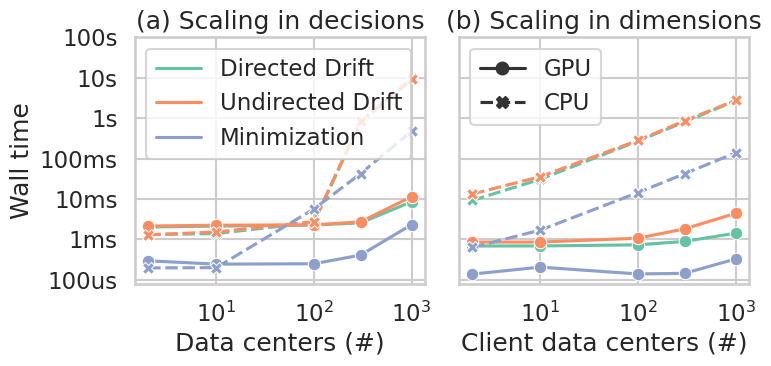

In [33]:
df3 = pd.read_csv("results/use_case_drift/data_center_scaling_oracle.csv")
df3["drift_type"].replace({"DriftType.DIRECTED": "Directed Drift", "DriftType.UNDIRECTED": "Undirected Drift"}, inplace=True)
df_tmp = pd.read_csv("results/use_case_minimization/data_center_scaling_oracle.csv")
df_tmp["drift_type"] = "Minimization"

df3 = pd.concat([df3, df_tmp])

df3["time_per_simulation_ms"] = df3["time_per_simulation"] * 1000
df3["device"].replace({"cpu": "CPU", "cuda": "GPU"}, inplace=True)

df3["Approach"] = df3["drift_type"] #+ " (" + df3["device"] + ")"


df3_params = pd.read_csv("results/use_case_drift/client_data_center_scaling_oracle.csv")
df3_params["drift_type"].replace({"DriftType.DIRECTED": "Directed Drift", "DriftType.UNDIRECTED": "Undirected Drift"}, inplace=True)
df_tmp = pd.read_csv("results/use_case_minimization/client_data_center_scaling_oracle.csv")
df_tmp["drift_type"] = "Minimization"

df3_params = pd.concat([df3_params, df_tmp])

df3_params["time_per_simulation_ms"] = df3_params["time_per_simulation"] * 1000
df3_params["device"].replace({"cpu": "CPU", "cuda": "GPU"}, inplace=True)

df3_params["Approach"] = df3_params["drift_type"] #+ " (" + df3["device"] + ")"

# Make two subplots that are double the width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# Plot time of oracle
colors = sns.color_palette('Set2')#[4:7]
sns.lineplot(data=df3, x="num_data_centers", y="time_per_simulation_ms", palette=colors, ax=ax1, dashes=True, markers=True, style="device", hue="Approach")
sns.lineplot(data=df3_params, x="num_client_data_centers", y="time_per_simulation_ms", palette=colors, ax=ax2, dashes=True, markers=True, style="device", hue="Approach")
# Plot time of ILP as vertical line
#ax1.axhline(y=ilp_time*2, color="r", linestyle="--", linewidth=1)
# Label ILP line
#ax1.text(0.5, 0.9, "ILP", transform=ax1.transAxes, color="r", fontsize=15, ha="center", va="center", weight="bold")

# Make both axes logarithmic
ax1.set_xscale("log")
ax1.set_yscale("log")

yticks=[0.1, 1, 10, 100, 1000, 10000, 100000]
yticklabels=['100us', '1ms', '10ms', '100ms', '1s', '10s', '100s']
ax2.set(yticks=yticks, yticklabels=yticklabels)

ax1.set_ylabel("Wall time")
ax1.set_xlabel("Data centers (#)")
ax1.set_title("(a) Scaling in decisions")

ax2.set_xlabel("Client data centers (#)")
ax2.set_title("(b) Scaling in dimensions")

# Remove title from legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[1:4], labels=labels[1:4], title=None)
ax2.legend(handles=handles[5:], labels=labels[5:], title=None)

fig.tight_layout()
fig.savefig("./figures/scaling_with_drift.pdf", bbox_inches="tight")
#display(fig)